In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
df.columns = df.columns.str.strip()  # removes any leading/trailing spaces


In [10]:
# Step 2: Load preprocessed dataset
df = pd.read_csv(r"C:\Desktop\titanic_cleaned.csv")
print(df.head())


# Then define features and target
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)  # Drop ID-like and text columns( all features)
y = df['Survived']  #only target one


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            113803  0.420730       False        True  

In [13]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict on test data
y_pred = lr.predict(X_test)


In [16]:
# Evaluate with MAE, MSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation:
Mean Absolute Error (MAE): 0.3226
Mean Squared Error (MSE): 0.1713
R² Score: 0.2976


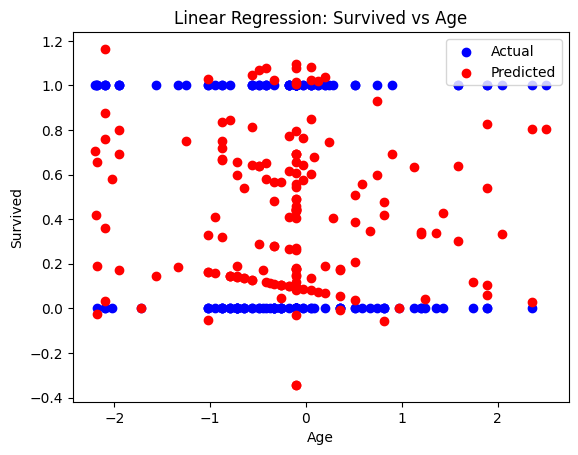

In [17]:
# Plot regression line using only one feature like Age for visualization
plt.scatter(X_test['Age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Linear Regression: Survived vs Age')
plt.legend()
plt.show()


In [18]:
# Show coefficients for each feature
coefficients = pd.Series(lr.coef_, index=X.columns)
print("Feature Coefficients:")
print(coefficients)


Feature Coefficients:
Pclass       -0.161475
Sex           0.514950
Age          -0.077960
SibSp        -0.060517
Parch        -0.010135
Fare          0.054561
Embarked_Q    0.031478
Embarked_S   -0.053675
dtype: float64
